# Detecting fake news: binary classification of fake vs. true news based on textual characteristics of news articles
By Sarah Gauthier, Jessie Liang and Vinay Valson 2025-11-19

In [58]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import(
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline, make_pipeline
import altair as alt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from scipy.stats import expon, lognorm, loguniform, randint, uniform, norm, randint

## Summary

## Introduction

## Methods & Results

In [2]:
true_url = "../data/True.csv" 
fake_url = "../data/Fake.csv"
true_df = pd.read_csv(true_url)
fake_df = pd.read_csv(fake_url)

In [3]:
true_df['target'] = 'True'
true_df['subject'] = true_df['subject'].replace('politicsNews', 'political')
true_df['subject'] = true_df['subject'].replace('worldnews', 'non-political')
true_df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,political,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,political,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,political,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,political,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,political,"December 29, 2017",True


In [4]:
fake_df['target'] = 'Fake'
fake_df['subject'] = fake_df['subject'].replace('politics', 'political')
fake_df['subject'] = fake_df['subject'].replace('left-news', 'political')
fake_df['subject'] = fake_df['subject'].replace('Government News', 'political')
fake_df['subject'] = fake_df['subject'].replace('News', 'non-political')
fake_df['subject'] = fake_df['subject'].replace('US_News', 'non-political')
fake_df['subject'] = fake_df['subject'].replace('Middle-east', 'non-political')
fake_df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,non-political,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,non-political,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",non-political,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",non-political,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,non-political,"December 25, 2017",Fake


In [27]:
complete_df = pd.concat([true_df, fake_df])

# Split into train/test data sets
train_df, test_df = train_test_split(
    complete_df, train_size=0.80, random_state=123
)

X_train, y_train = train_df.drop(columns=["target"]), train_df["target"]
X_test, y_test = test_df.drop(columns=["target"]), test_df["target"]

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35918 entries, 4453 to 15725
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    35918 non-null  object
 1   text     35918 non-null  object
 2   subject  35918 non-null  object
 3   date     35918 non-null  object
 4   target   35918 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


#### Count of Fake vs. Real News Articles

In [7]:
alt.data_transformers.enable('vegafusion')

count_chart = alt.Chart(train_df).mark_bar().encode(
    x=alt.X('count():Q', title='Count'),
    y=alt.Y('target:N', title='Label'),
    color='target:N'
)

count_chart

alt.Chart(...)

In [8]:
fake_text = train_df[train_df['target'] == 'Fake']['text']
true_text = train_df[train_df['target'] == 'True']['text']
fake_text = fake_text.str.replace(r'[^\w\s]', '', regex=True) # remove punctuation
true_text = true_text.str.replace(r'[^\w\s]', '', regex=True) # remove punctuation
fake_words = fake_text.str.cat(sep=" ")
true_words = true_text.str.cat(sep=" ")

fake_titles = train_df[train_df['target'] == 'Fake']['title']
true_titles = train_df[train_df['target'] == 'True']['title']
fake_titles = fake_titles.str.replace(r'[^\w\s]', '', regex=True) # remove punctuation
true_ttitles = true_titles.str.replace(r'[^\w\s]', '', regex=True) # remove punctuation
fake_title_words = fake_titles.str.cat(sep=" ")
true_title_words = true_titles.str.cat(sep=" ")

#### Word Clouds for Titles Column

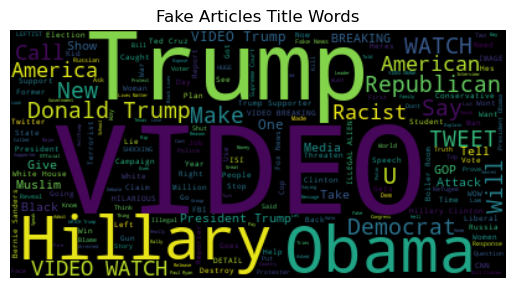

In [9]:
wordcloud_title_fake = WordCloud().generate(fake_title_words)
plt.figure()
plt.imshow(wordcloud_title_fake, interpolation="bilinear")
plt.title("Fake Articles Title Words")
plt.axis("off")
plt.show()

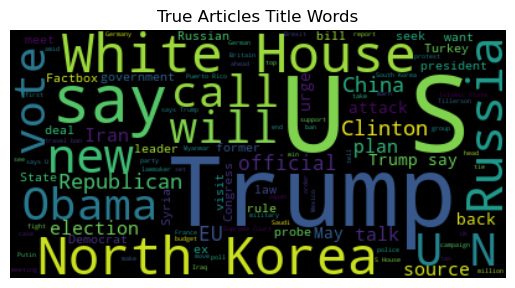

In [10]:
wordcloud_title_true = WordCloud().generate(true_title_words)
plt.figure()
plt.imshow(wordcloud_title_true, interpolation="bilinear")
plt.title("True Articles Title Words")
plt.axis("off")
plt.show()

#### Word Clouds for Text Column

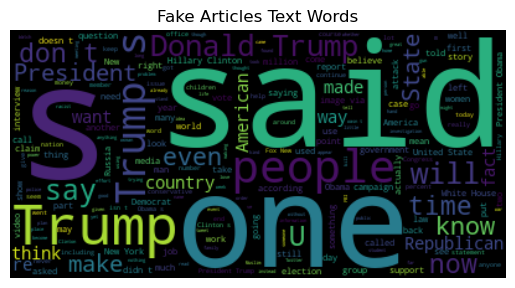

In [11]:
wordcloud_fake = WordCloud().generate(fake_words)
plt.figure()
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.title("Fake Articles Text Words")
plt.axis("off")
plt.show()

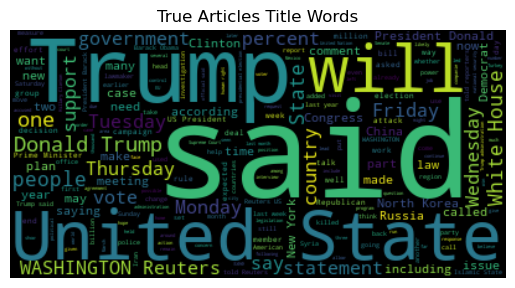

In [12]:
wordcloud_true = WordCloud().generate(true_words)
plt.figure()
plt.imshow(wordcloud_true, interpolation="bilinear")
plt.title("True Articles Title Words")
plt.axis("off")
plt.show()

#### Comparing title and text length between fake and real news articles

In [13]:
train_df["title_length"] = train_df["title"].str.len()
train_df["text_length"] = train_df["text"].str.len()

In [14]:
title_length_hist = alt.Chart(train_df).mark_bar(opacity=0.75).encode(
    x=alt.X('title_length',
            bin=alt.Bin(maxbins=30),
            title='Title Length (Number of Words)'),
    y=alt.Y('count()', title='Number of Articles'),
    color=alt.Color('target', title='News Type')
).properties(
    title='Distribution of Article Title Lengths by News Type',
    height=300,
    width=500
)

title_length_hist

alt.Chart(...)

In [15]:
filtered_df = train_df[train_df['text_length'] < 12000]

text_length_hist = alt.Chart(filtered_df).mark_bar(opacity=0.75).encode(
    x=alt.X('text_length',
            bin=alt.Bin(maxbins=30),
            title='Text Length (Number of Words)'),
    y=alt.Y('count()', title='Number of Articles'),
    color=alt.Color('target', title='News Type')
).properties(
    title='Distribution of Article Text Lengths by News Type',
    height=300,
    width=500
)

text_length_hist

alt.Chart(...)

In [16]:
number_of_fake = train_df[train_df['target'] == 'Fake'].shape[0]
number_of_true = train_df[train_df['target'] == 'True'].shape[0]
plot_df = train_df.groupby(['target', 'subject']).size().reset_index()
plot_df.columns = ['target', 'subject', 'count']
plot_df.loc[plot_df['target'] == 'Fake', 'total'] = number_of_fake
plot_df.loc[plot_df['target'] == 'True', 'total'] = number_of_true
plot_df['percentage'] = plot_df['count'] / plot_df['total']
alt.Chart(plot_df).mark_bar().encode(
    alt.X('percentage'),
    alt.Y('subject'),
    alt.Color('subject')
).facet(
    'target',
    columns=1
)

alt.FacetChart(...)

In [88]:
title_feature = 'title'
text_feature = 'text'
categorical_feature = ['subject']
drop_feature = ['date']

title_pipe = make_pipeline(
    FunctionTransformer(lambda x: np.ravel(x)), 
    CountVectorizer()
)
text_pipe = make_pipeline(
    FunctionTransformer(lambda x: np.ravel(x)), 
    CountVectorizer()
)

preprocessor = ColumnTransformer(
    [
        ("one_hot", OneHotEncoder(drop="if_binary"), categorical_feature),
        ("title_vectorizer", title_pipe, "title"),
        ("text_vectorizer", text_pipe, "text"),
        ("drop", "drop", drop_feature)
    ]
)

pipe = make_pipeline(preprocessor, MultinomialNB())

In [101]:
param_dist = {
    "columntransformer__title_vectorizer__countvectorizer__max_features": randint(1, 200),
    "columntransformer__text_vectorizer__countvectorizer__max_features": randint(1, 5000),
    "multinomialnb__alpha": 10.0 ** np.arange(-7, 1)
}

random_search = RandomizedSearchCV(pipe, 
                                   param_distributions=param_dist, 
                                   n_iter=10, n_jobs=-1,
                                   return_train_score=True,
                                   random_state=123) 

In [102]:
random_search.fit(X_train, y_train)
random_search.best_params_

{'columntransformer__text_vectorizer__countvectorizer__max_features': 1160,
 'columntransformer__title_vectorizer__countvectorizer__max_features': 106,
 'multinomialnb__alpha': np.float64(0.0001)}

In [103]:
random_search.best_score_

np.float64(0.95523124461462)

In [104]:
random_search.score(X_test, y_test)

0.950890868596882

## Discussion

## References